Enter the value of n (size of the puzzle grid):  3


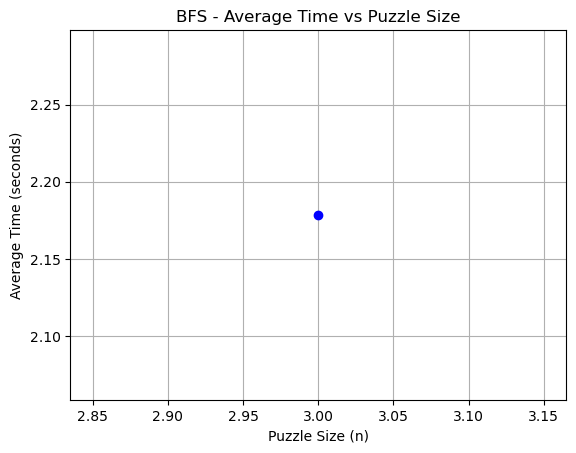

In [3]:
# import numpy as np
# import random
# import collections
# import time
# import matplotlib.pyplot as plt

# n_values = [int(input("Enter the value of n (size of the puzzle grid): "))]
# bfs_times = []  # Example values for n. You can modify this for different puzzle sizes
# average_times = []

# def generate_puzzle(n):
#     numbers = list(range(n * n))
#     random.shuffle(numbers)
#     puzzle = np.array(numbers).reshape(n, n)
#     return puzzle

# def goal_test(puzzle):
#     n = puzzle.shape[0]
#     goal = np.arange(1, n * n)
#     goal = np.append(goal, 0)
#     return np.array_equal(puzzle.flatten(), goal)

# def find_zero(state):
#     return tuple(np.argwhere(state == 0)[0])

# def move_tile(puzzle, direction,n):
#     row, col = find_zero(puzzle)
#     new_puzzle = puzzle.copy()

#     if direction == "up" and row > 0:
#         new_puzzle[row, col], new_puzzle[row - 1, col] = new_puzzle[row - 1, col], new_puzzle[row, col]

#     elif direction == "down" and row < n - 1:
#         new_puzzle[row, col], new_puzzle[row + 1, col] = new_puzzle[row + 1, col], new_puzzle[row, col]

#     elif direction == "left" and col > 0:
#         new_puzzle[row, col], new_puzzle[row, col - 1] = new_puzzle[row, col - 1], new_puzzle[row, col]

#     elif direction == "right" and col < n - 1:
#         new_puzzle[row, col], new_puzzle[row, col + 1] = new_puzzle[row, col + 1], new_puzzle[row, col]
#     else:
#         return None

#     return new_puzzle

# def bfs_solve(puzzle, time_limit=60):
#     queue = collections.deque([puzzle])
#     visited = set()
#     all_states = []
#     start_time = time.time()

#     while queue:
#         if time.time() - start_time > time_limit:
#             return []

#         current_state = queue.popleft()
#         state_tuple = tuple(current_state.flatten())

#         if state_tuple in visited:
#             continue

#         visited.add(state_tuple)
#         all_states.append(current_state)

#         if goal_test(current_state):
#             return all_states

#         new_states = []
#         for move in ["left", "right", "up", "down"]:
#             new_state = move_tile(current_state, move,n)
#             if new_state is not None and tuple(new_state.flatten()) not in visited:
#                 new_states.append(new_state)

#         if new_states:
#             queue.extend(new_states)

#     return all_states

# for n in n_values:
#     valid_results = []
#     for i in range(10):
#         puzzle = generate_puzzle(n)
#         start_time = time.time()
#         solution_states = bfs_solve(puzzle)

#         if solution_states:
#             end_time = time.time()
#             valid_results.append(end_time - start_time)

#     if valid_results:
#         avg_time = sum(valid_results) / len(valid_results)
#         average_times.append(avg_time)
#     else:
#         average_times.append(None)  # If no solution within time limit, append None

# # plt.plot(n_values, average_times, marker='o', linestyle='-', color='b')
# # plt.xlabel('Puzzle Size (n)')
# # plt.ylabel('Average Time (seconds)')
# # plt.title('BFS - Average Time vs Puzzle Size')
# # plt.grid(True)
# # plt.show()




import numpy as np
import random
import collections
import time
import matplotlib.pyplot as plt

# Function to check if a puzzle is solvable
def is_solvable(puzzle):
    flat_puzzle = puzzle.flatten()
    inv_count = sum(
        1 for i in range(len(flat_puzzle)) for j in range(i + 1, len(flat_puzzle))
        if flat_puzzle[i] and flat_puzzle[j] and flat_puzzle[i] > flat_puzzle[j]
    )
    return inv_count % 2 == 0

# Generate a random solvable puzzle
def generate_puzzle(n):
    while True:
        numbers = list(range(n * n))
        random.shuffle(numbers)
        puzzle = np.array(numbers).reshape(n, n)
        if is_solvable(puzzle):
            return puzzle

# Check if the puzzle is in goal state
def goal_test(puzzle):
    n = puzzle.shape[0]
    goal = np.arange(1, n * n)
    goal = np.append(goal, 0)
    return np.array_equal(puzzle.flatten(), goal)

# Find the position of the empty tile (zero)
def find_zero(state):
    return tuple(np.argwhere(state == 0)[0])

# Move a tile in the given direction
def move_tile(puzzle, direction, n):
    row, col = find_zero(puzzle)
    new_puzzle = puzzle.copy()

    if direction == "up" and row > 0:
        new_puzzle[row, col], new_puzzle[row - 1, col] = new_puzzle[row - 1, col], new_puzzle[row, col]
    elif direction == "down" and row < n - 1:
        new_puzzle[row, col], new_puzzle[row + 1, col] = new_puzzle[row + 1, col], new_puzzle[row, col]
    elif direction == "left" and col > 0:
        new_puzzle[row, col], new_puzzle[row, col - 1] = new_puzzle[row, col - 1], new_puzzle[row, col]
    elif direction == "right" and col < n - 1:
        new_puzzle[row, col], new_puzzle[row, col + 1] = new_puzzle[row, col + 1], new_puzzle[row, col]
    else:
        return None

    return new_puzzle

# BFS algorithm to solve the puzzle
def bfs_solve(puzzle, n, time_limit=60):
    queue = collections.deque([puzzle])
    visited = set()
    start_time = time.time()

    while queue:
        if time.time() - start_time > time_limit:
            return None  # Return None if time limit exceeded

        current_state = queue.popleft()
        state_tuple = tuple(current_state.flatten())

        if state_tuple in visited:
            continue

        visited.add(state_tuple)

        if goal_test(current_state):
            return time.time() - start_time  # Return time taken to solve

        for move in ["left", "right", "up", "down"]:
            new_state = move_tile(current_state, move, n)
            if new_state is not None and tuple(new_state.flatten()) not in visited:
                queue.append(new_state)

    return None  # Return None if no solution found

# Get input and initialize lists
n_values = [int(input("Enter the value of n (size of the puzzle grid): "))]
average_times = []

# Run BFS for different puzzle sizes
for n in n_values:
    valid_results = []
    
    for _ in range(10):  # Generate 10 random puzzles
        puzzle = generate_puzzle(n)
        solve_time = bfs_solve(puzzle, n)

        if solve_time is not None:
            valid_results.append(solve_time)

    # Store average time or inf if all failed
    avg_time = sum(valid_results) / len(valid_results) if valid_results else float('inf')
    average_times.append(avg_time)

# Filter values before plotting
filtered_n_values = [n for i, n in enumerate(n_values) if average_times[i] != float('inf')]
filtered_avg_times = [t for t in average_times if t != float('inf')]

# Plot results
plt.plot(filtered_n_values, filtered_avg_times, marker='o', linestyle='-', color='b')
plt.xlabel('Puzzle Size (n)')
plt.ylabel('Average Time (seconds)')
plt.title('BFS - Average Time vs Puzzle Size')
plt.grid(True)
plt.show()
